In [15]:
# importing libraries

Importing libraries

In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score,recall_score
from sklearn.neighbors import KNeighborsClassifier

In [17]:
df  = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.select_dtypes(include='number').columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
#filling zero values with average value
non_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in non_zeros:
    df[col] = df[col].replace(0,np.NaN)
    df[col] = df[col].fillna(df[col].mean())

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


ploting relationship between variables using pairplot

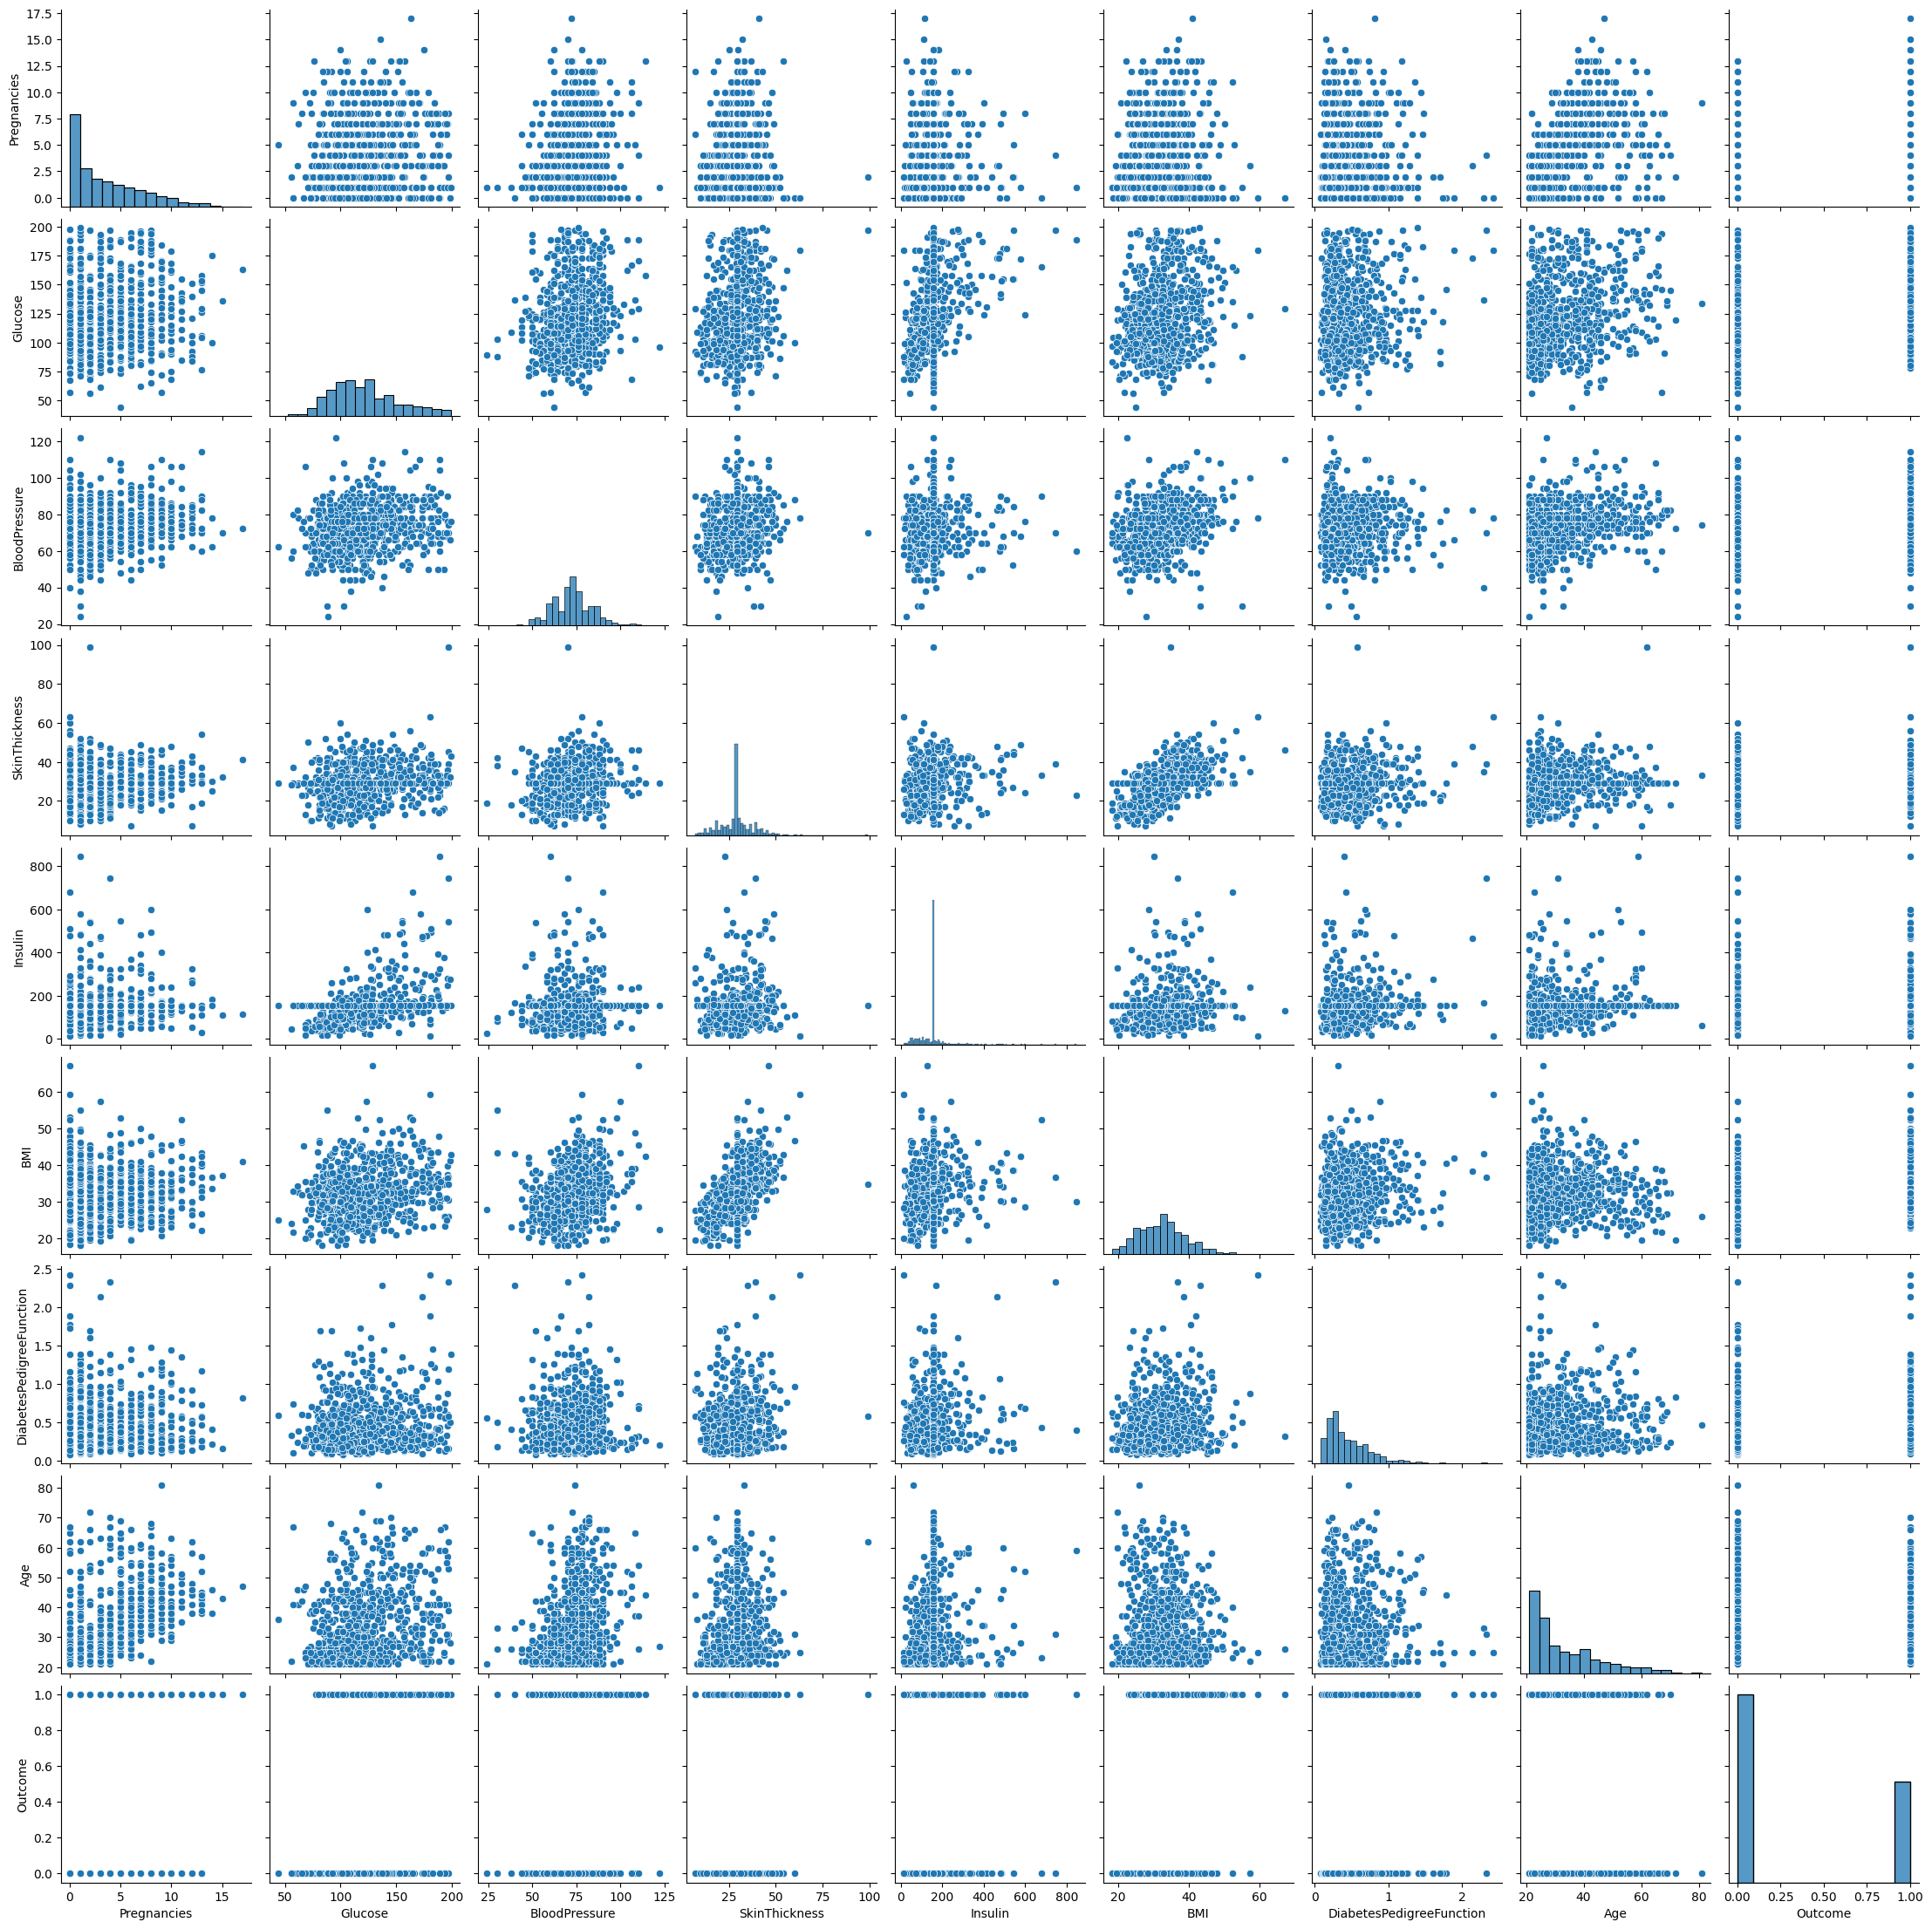

In [21]:
sns.pairplot(df)
plt.show()

Spliting training and testing set

In [22]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, y_train , X_test, y_test = train_test_split(X,y, test_size=.2,random_state=123)
print(len(X_train),len(y_train),len(X_test),len(y_test))

614 154 614 154


Feature Scaling data

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scale = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scale.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scale.transform(X_test)

# Check the first 6 rows of the transformed training data
print(X_train[:6])


c:\Users\anuz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

Finding the value of K


In [ ]:
len(X_test)
math.sqrt(len(X_test))

24.779023386727733

Modeling

In [ ]:
clf = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
clf.fit(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [614, 154]

Predicting

In [ ]:
y_pred = clf.predict(X_test)
print(y_test[:6])
print(y_pred[:6])

Confustion Matrix


In [ ]:
cm = (y_test,y_pred)
cm

NameError: name 'y_pred' is not defined

Heatmap

In [ ]:
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot= True)
plt.xlabel("Actual")
plt.ylabe("predicted")
plt.show()

Peformance Measures